The purpose of this dataset is to find out the prediction of  whether the passengers are dead or alive.

https://www.kaggle.com/c/titanic

## 1-Libraries

In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")


## 2-Data Set

This test data is not the data on which we will construct model.

The test data is used to test our prediction is true or false

So,We will construct our models on train data 

After construct our model ,we are going to looking at which model is the best one.

And using the model we will make prediction on test data

In [2]:
#import train_data and test_data
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
graph_data=pd.read_csv("/kaggle/input/titanic/train.csv")
test_data_forfinal=pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
#preview train_data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#prewiev test_data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Quality and Missing Values

Everytime in a Data set,there may be missing value.

For that reason,we can make:

1.Dropping the columns whish have missing values<br>
2.Filling in the missing values<br>
* Mean
*Median

In [5]:
#looking at the missing values of the train data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#looking at the missing values of the test data
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 3.1 Age-Missing Values

In [7]:
# Percentage of the missing values on 'Age' columns
train_data["Age"].isnull().sum()/train_data.shape[0]*100

19.865319865319865

Approximately the %20 of the  passengers' ages are missing

We can handle it

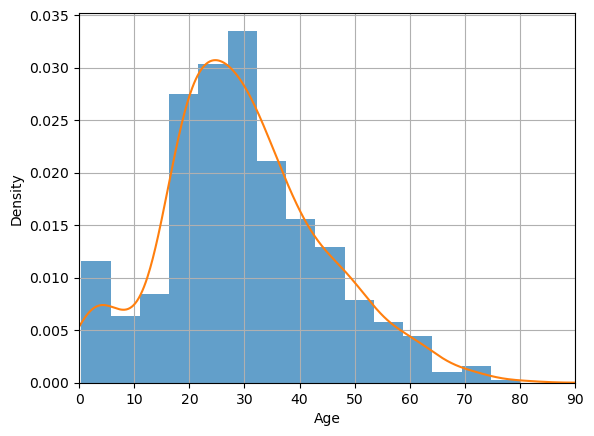

In [8]:
ax = train_data['Age'].hist(bins=15, density=True, stacked=True, alpha=0.7)

train_data['Age'].plot(kind='density')

ax.set(xlabel='Age')
plt.xlim(0, 90)
plt.grid()
plt.show()

The histogram graph is a right-skewed(Positive Skewness).

Using the median will be better

In [9]:
#Mean of the 'Age' column
#skipna=skip the missing data
train_data["Age"].mean(skipna=True)

29.69911764705882

In [10]:
#Median of the "Age" column
#skipna=skip the missing data
train_data["Age"].median()

28.0

### 3.2 Cabin-Missing Values

In [11]:
#Percentage of the missing values on the 'Cabin' column
train_data["Cabin"].isnull().sum()/train_data.shape[0]*100

77.10437710437711

Approximately the %77 of the  passengers' cabin informations are missing.

The percentage of the missing values is too much to fill in the missing values by using knowing data

That's why,we have to drop the column

### 3.3 Embarked-Missing Values

In [12]:
#Percentage of the missing values on 'Embarked' columns
train_data["Embarked"].isnull().sum()/train_data.shape[0]*100

0.22446689113355783

The %0.22 of the passengers' embarked informations are missing.

We can handle it,too

<AxesSubplot:xlabel='Embarked', ylabel='count'>

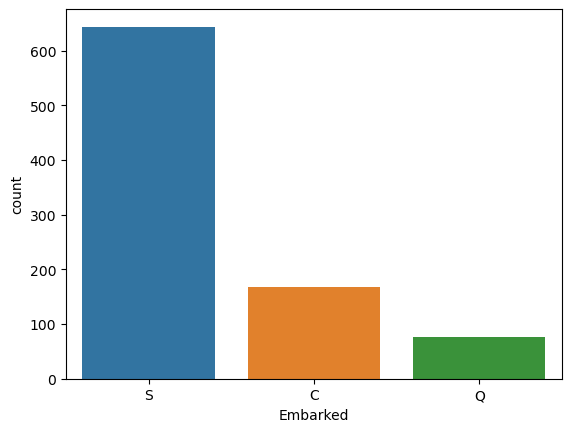

In [13]:
# looking at where the passengers get in.
sns.countplot(data=train_data,x=train_data["Embarked"])

In [14]:
#Exactly numbers of the 'Embarked' column
print("Where did the passengers get in:(C = Cherbourg, Q = Queenstown, S = Southampton)")
train_data["Embarked"].value_counts()

Where did the passengers get in:(C = Cherbourg, Q = Queenstown, S = Southampton)


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
print("Most count value of the 'Embarked' column is :",train_data["Embarked"].value_counts().idxmax())

Most count value of the 'Embarked' column is : S


Because of the type of 'Embarked' column(categoric),we cannot use the mean,median to fill in the missing values.

For that reason and because of the above graph, we can fill in the missing values by S=Southampton,because the values of the between the number of the S=Southampton and other is too many.

### 3.4 Last Decision For the Missing Values

* Age->By using median,we will fill in the missing values
* Embarked->We will fill in the missing values by 'S'
* Cabin->We will drop the column

**Every operations are have to made in both train and test data**

In [16]:
train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [17]:
test_data["Age"].fillna(test_data["Age"].median(skipna=True), inplace=True)
test_data["Embarked"].fillna(test_data['Embarked'].value_counts().idxmax(), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [18]:
#looking at the missing values of the train data,again
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
#looking at the missing values of the test data,again
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

### 3.5 Fare-Missing Values

In [20]:
# looking at 'Fare' column
test_data['Fare'].isnull().sum()/test_data.shape[0]*100

0.23923444976076555

We can handle it,too

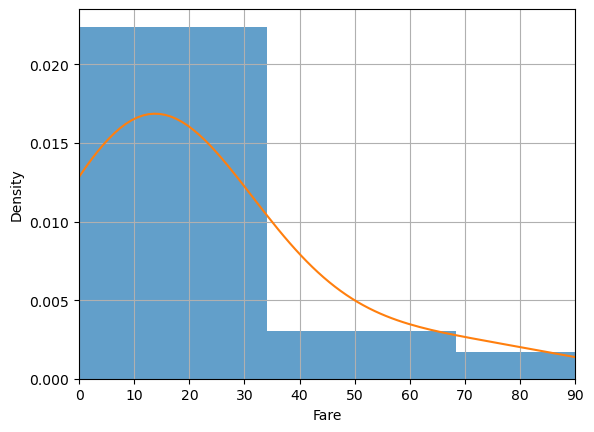

In [21]:
ax = test_data['Fare'].hist(bins=15, density=True, stacked=True, alpha=0.7)

test_data['Fare'].plot(kind='density')

ax.set(xlabel='Fare')
plt.xlim(0, 90)
plt.grid()
plt.show()

The histogram graph is a right-skewed(Positive Skewness).

Using the median will be better

In [22]:
#Mean of the 'Fare' column
#skipna=skip the missing data
test_data["Fare"].mean(skipna=True)

35.627188489208635

In [23]:
#Median of the 'Fare' column
#skipna=skip the missing data
test_data["Fare"].median(skipna=True)

14.4542

In [24]:
test_data["Fare"].fillna(test_data["Fare"].median(skipna=True),inplace=True)

In [25]:
#looking at the missing values of the test data,again
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 3.6 New Feature

There are two columns that are related to each other:SibSp,Parch
* **SibSp**: # of siblings / spouses aboard the Titanic
* **Parch**: # of parents / children aboard the Titanic

It would be better to collect these two variables under one variable: Is she/he traveling alone?

Let be the name of the new column is **isAlone**

In [26]:
train_data['isAlone'] = np.where((train_data["SibSp"] + train_data["Parch"]) > 0, 0, 1)

In [27]:
test_data['isAlone'] = np.where((test_data["SibSp"] + test_data["Parch"]) > 0, 0, 1)

In [28]:
#Drop the 'SibSp' and 'Parch' columns
train_data.drop('SibSp', axis=1, inplace=True)

train_data.drop('Parch', axis=1, inplace=True)

test_data.drop('SibSp', axis=1, inplace=True)

test_data.drop('Parch', axis=1, inplace=True)

### 3.7 Categorical Variables

Type of the "Pclass","Embarked","Sex" are categorical.We need to encode them.

In [29]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [30]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,isAlone
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,0


In [31]:
#encode them with get_dummies()
train_data=pd.get_dummies(train_data,columns=["Pclass","Embarked","Sex"],drop_first=True)
test_data=pd.get_dummies(test_data,columns=["Pclass","Embarked","Sex"],drop_first=True)

In [32]:
train_data.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,isAlone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,1,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,1,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,1,0,1,1


In [33]:
test_data.head()

,PassengerId,Name,Age,Ticket,Fare,isAlone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,892,"Kelly, Mr. James",34.5,330911,7.8292,1,0,1,1,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,0,0,1,0,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,1,1,0,1,0,1
3,895,"Wirz, Mr. Albert",27.0,315154,8.6625,1,0,1,0,1,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,0,0,1,0,1,0


Drop the unuseful columns:"PassengerId", "Name" and "Ticket" 

In [34]:
train_data.drop('PassengerId', axis=1, inplace=True)
train_data.drop('Name', axis=1, inplace=True)
train_data.drop('Ticket', axis=1, inplace=True)

test_data.drop('PassengerId', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

In [35]:
train_data.head()

,Survived,Age,Fare,isAlone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1


In [36]:
test_data.head()

,Age,Fare,isAlone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,1,1,0,1
1,47.0,7.0000,0,0,1,0,1,0
2,62.0,9.6875,1,1,0,1,0,1
3,27.0,8.6625,1,0,1,0,1,1
4,22.0,12.2875,0,0,1,0,1,0


## 4.Exploratory Data Analysis (EDA)

In [37]:
# shape of the train data
train_data.shape

(891, 9)

In [38]:
# columns names
col_names = train_data.columns
col_names

Index(['Survived', 'Age', 'Fare', 'isAlone', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

### 4.1 EDA for 'Age'

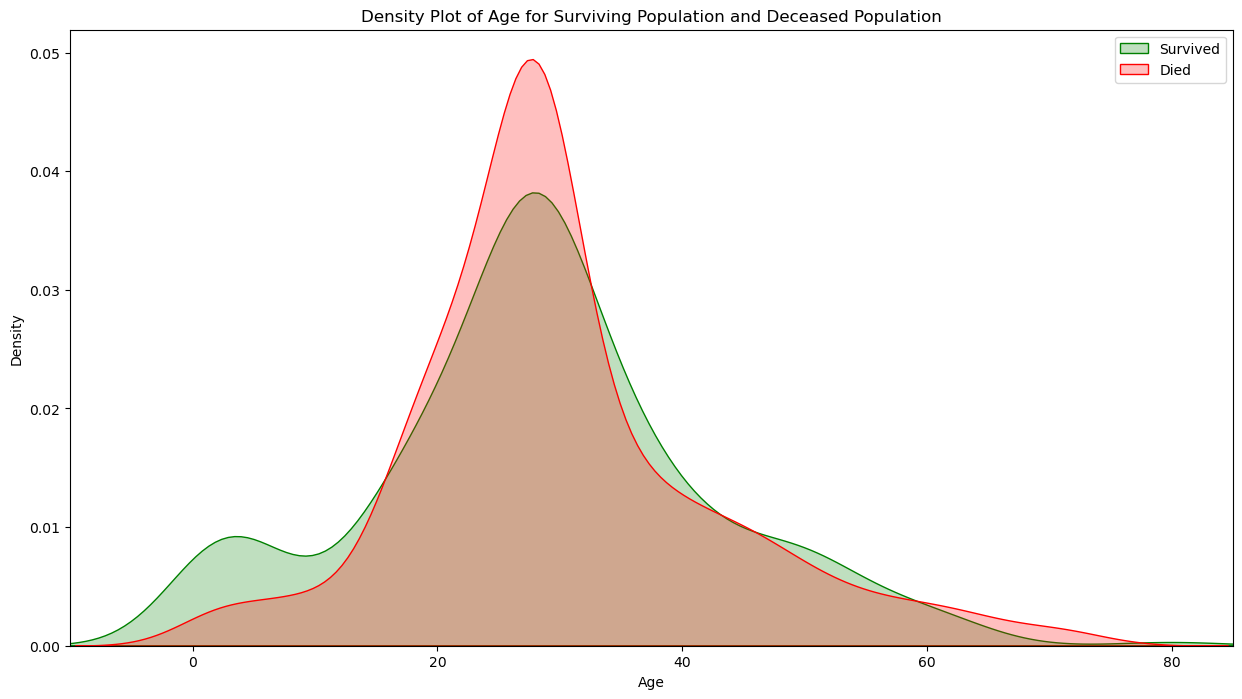

In [39]:
plt.figure(figsize=(15,8))

# Survived == 1
ax = sns.kdeplot(train_data["Age"][train_data.Survived == 1], color="green", shade=True)

# Survived == 0
sns.kdeplot(train_data["Age"][train_data.Survived == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

The age distributions of survivors and those who died are quite similar.

We can say that among the survivors, the proportion of children and young people is higher.

This may be because parents are giving their children life jackets and boats to save theirs, instead of saving their own. (just conjecture of course)

### 4.2 EDA for 'Fare'

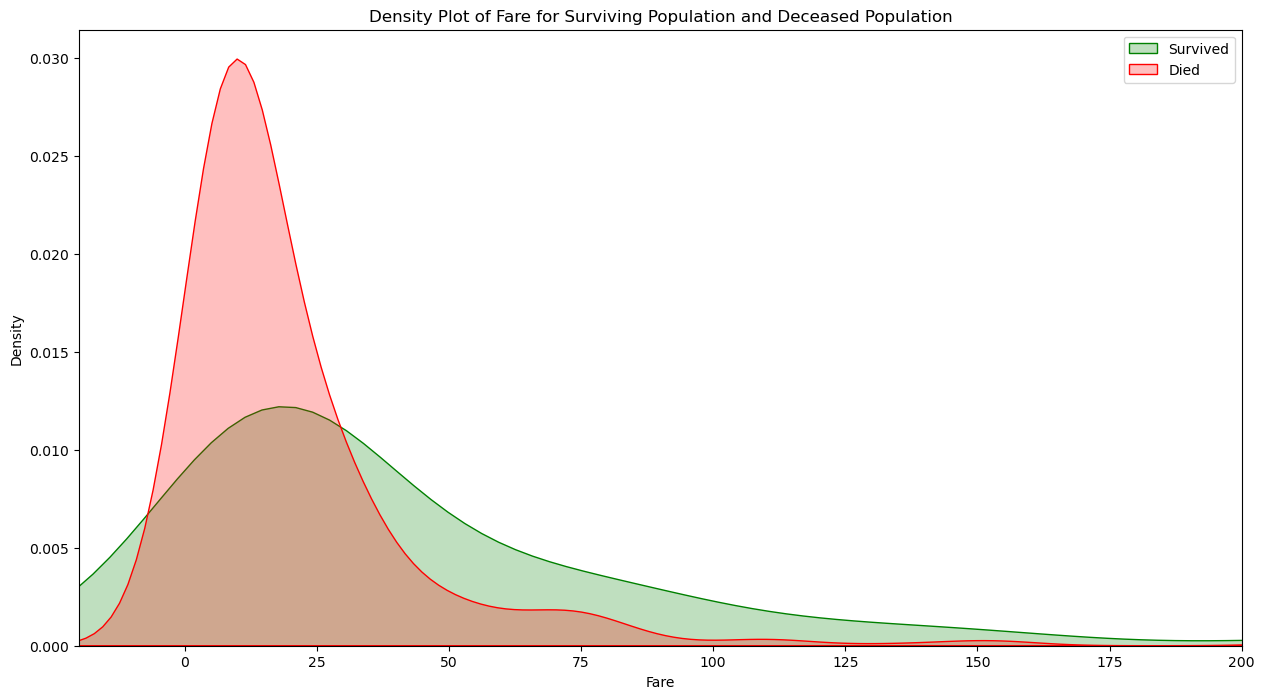

In [40]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(train_data["Fare"][train_data.Survived == 1], color="green", shade=True)

sns.kdeplot(train_data["Fare"][train_data.Survived == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

When we look at the graph, we see that the survival and death rates are clearly separated from each other.

Pay is likely to be an important factor in our model.

Low fare passengers have a much higher death rate.

Those who pay higher wages have a higher survival rate.

### 4.3 EDA for 'Passenger Class'

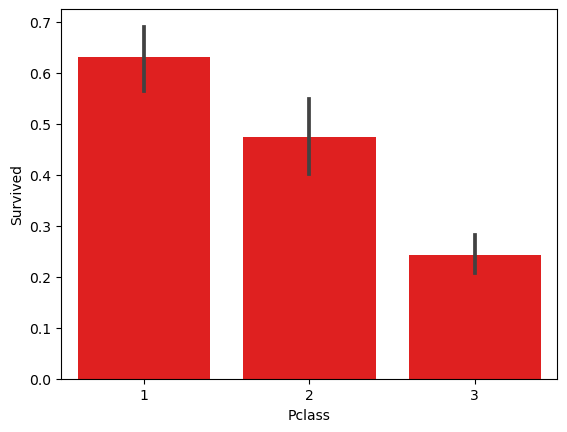

In [41]:
sns.barplot(data=graph_data,x="Pclass", y="Survived",  color="red")

plt.show()

First class passengers have higher survival rates.

Therefore, this confirms the assumption we made for Fare.

### 4.4 EDA for 'isAlone'

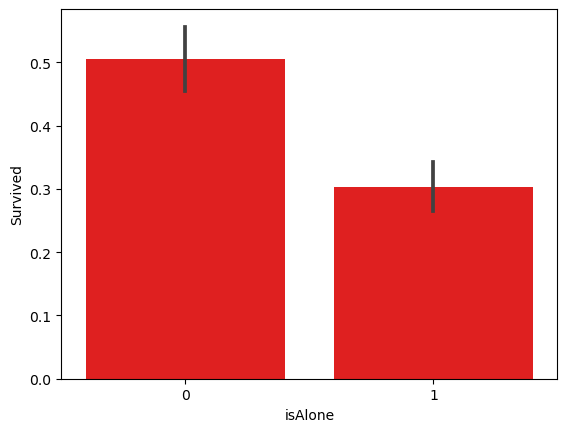

In [42]:
sns.barplot(data=train_data,x='isAlone', y='Survived',  color="red")

plt.show()

Those traveling with family (isAlone = 0) have higher survival rates.

### 4.5 EDA for Sex

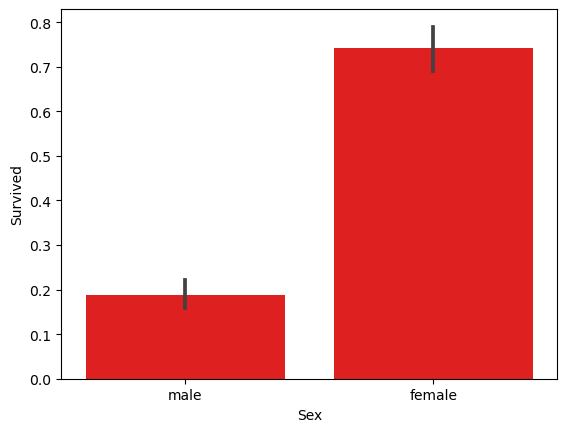

In [43]:
sns.barplot(data=graph_data,x='Sex', y='Survived',color="red")

plt.show()

When we look at gender, we see a big difference between the survival rates of men and women.

Survival rates for women are much higher.

## 5.Input and Output separation

In [44]:
y=train_data["Survived"]
train_data=train_data.drop("Survived",axis=1)

## 6.Feature Scaling

In [45]:
# seeing the train data
train_data.describe()

,Age,Fare,isAlone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.361582,32.204208,0.602694,0.206510,0.551066,0.086420,0.725028,0.647587
std,13.019697,49.693429,0.489615,0.405028,0.497665,0.281141,0.446751,0.477990
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,35.000000,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
#columns name
cols = train_data.columns

cols

Index(['Age', 'Fare', 'isAlone', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S', 'Sex_male'],
      dtype='object')

In [47]:
#import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [48]:
# let's train the scaler on train data
# scale the train data
train_data = scaler.fit_transform(train_data)

In [49]:
type(train_data)

numpy.ndarray

In [50]:
#converting it to DataFrame again
train_data=pd.DataFrame(train_data,columns=[cols])

In [51]:
train_data.head()

,Age,Fare,isAlone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,1.0,0.0
3,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,1.0


## 7.Train-Test Split

In [52]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2, random_state=2)

In [54]:
# Shape of the X_train
X_train.shape

(712, 8)

In [55]:
# Shape of the X_test
X_test.shape

(179, 8)

In [56]:
# Shape of the y_train
y_train.shape

(712,)

In [57]:
# Shape of the y_test
y_test.shape

(179,)

## 8.Model, Predict and Accuracy

### 8.1 Logistic Regression

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":[0,0.2,0.4,0.6,0.8,1.0],"solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"] ,"penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.2, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8019170579029733


In [59]:
lr_best=LogisticRegression(C=0.2,penalty="l2",solver="lbfgs")
lr_best.fit(X_train,y_train)
y_pred=lr_best.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix
lr_accuracy=accuracy_score(y_test,y_pred)
lr_accuracy

0.7486033519553073

<AxesSubplot:>

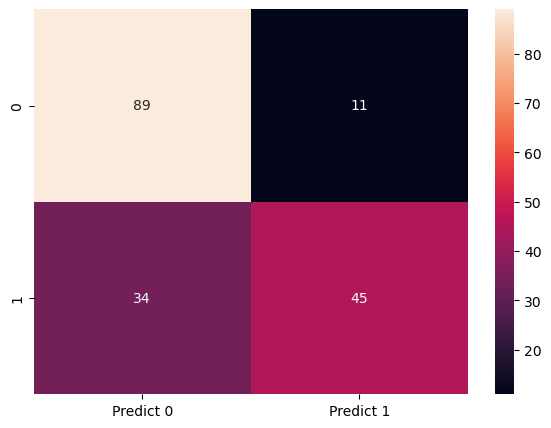

In [61]:
cm=confusion_matrix(y_test,y_pred)

lr_df=pd.DataFrame(cm,index=[i for i in ["0","1"]],columns=[i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize=(7,5))
sns.heatmap(lr_df,annot=True)

### 8.2 Gaussian Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
gnb_accuracy=accuracy_score(y_test,y_pred)
gnb_accuracy

0.7374301675977654

<AxesSubplot:>

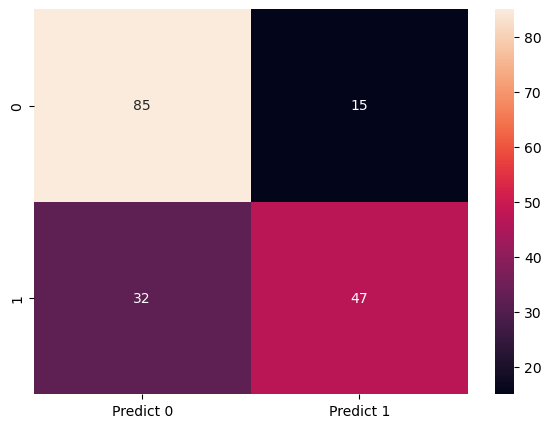

In [63]:
cm=confusion_matrix(y_test,y_pred)

gnb_df=pd.DataFrame(cm,index=[i for i in ["0","1"]],columns=[i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize=(7,5))
sns.heatmap(gnb_df,annot=True)

### 8.3 K-Nearest Neighbors

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid={"n_neighbors":[15,17,19,21,23,25,27],"weights":["uniform","distance"]}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=10)
knn_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 19, 'weights': 'uniform'}
accuracy : 0.8160015649452269


In [65]:
knn_best=KNeighborsClassifier(n_neighbors=19,weights="uniform")
knn_best.fit(X_train,y_train)
y_pred=knn_best.predict(X_test)
knn_accuracy=accuracy_score(y_test,y_pred)
knn_accuracy

0.7597765363128491

<AxesSubplot:>

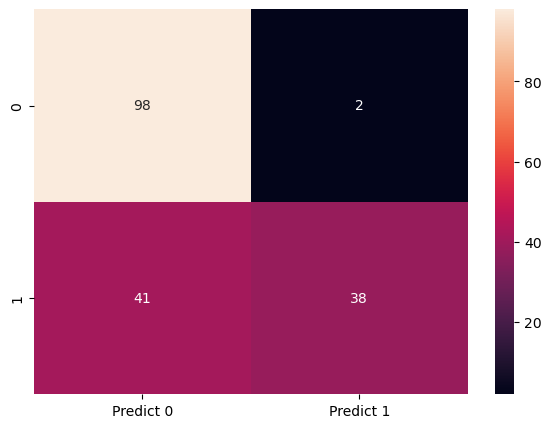

In [66]:
cm=confusion_matrix(y_test,y_pred)

knn_df=pd.DataFrame(cm,index=[i for i in ["0","1"]],columns=[i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize=(7,5))
sns.heatmap(knn_df,annot=True)

## 8.3 Support Vector Machine

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid={"C":[0.2,0.4,0.6,0.8,1],"gamma":["scale", "auto"],"kernel":["linear", "poly", "rbf", "sigmoid"]}
svm=SVC()
svm_cv=GridSearchCV(svm,grid,cv=10)
svm_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}
accuracy : 0.8230242566510173


In [68]:
svm_best=SVC(C=0.2,gamma="scale",kernel="rbf")
svm_best.fit(X_train,y_train)
y_pred=svm_best.predict(X_test)
svm_accuracy=accuracy_score(y_test,y_pred)
svm_accuracy

0.7653631284916201

<AxesSubplot:>

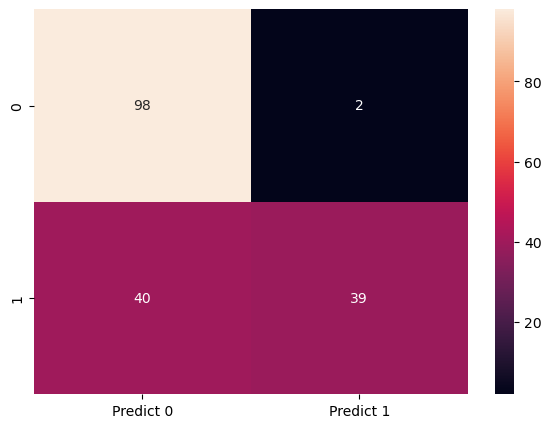

In [69]:
cm=confusion_matrix(y_test,y_pred)

svm_df=pd.DataFrame(cm,index=[i for i in ["0","1"]],columns=[i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize=(7,5))
sns.heatmap(svm_df,annot=True)

## 8.4 Decision Tree

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
grid={"criterion":["gini","entropy","log_loss"],"max_depth":[1,3,5,7]}
dtc=DecisionTreeClassifier()
dtc_cv=GridSearchCV(dtc,grid,cv=10)
dtc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",dtc_cv.best_params_)
print("accuracy :",dtc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 5}
accuracy : 0.8230633802816902


In [71]:
dtc_best=DecisionTreeClassifier(criterion="gini",max_depth=5)
dtc_best.fit(X_train,y_train)
y_pred=dtc_best.predict(X_test)
dtc_accuracy=accuracy_score(y_test,y_pred)
dtc_accuracy

0.776536312849162

<AxesSubplot:>

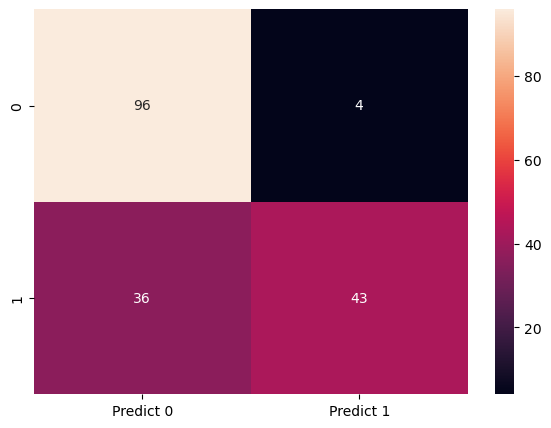

In [72]:
cm=confusion_matrix(y_test,y_pred)

dtc_df=pd.DataFrame(cm,index=[i for i in ["0","1"]],columns=[i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize=(7,5))
sns.heatmap(dtc_df,annot=True)

### 8.5 AdaBoost

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
grid={"n_estimators":[10,15,20,25,30],"learning_rate":[0,0.2,0.4,0.6,0.8,1]}
abc=AdaBoostClassifier()
abc_cv=GridSearchCV(abc,grid,cv=10)
abc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",abc_cv.best_params_)
print("accuracy :",abc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'learning_rate': 1, 'n_estimators': 15}
accuracy : 0.8187402190923319


In [74]:
abc_best=AdaBoostClassifier(learning_rate=1,n_estimators=15)
abc_best.fit(X_train,y_train)
y_pred=abc_best.predict(X_test)
abc_accuracy=accuracy_score(y_test,y_pred)
abc_accuracy

0.7541899441340782

<AxesSubplot:>

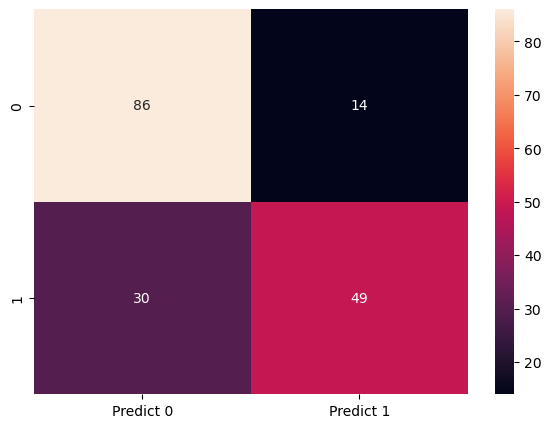

In [75]:
cm=confusion_matrix(y_test,y_pred)

abc_df=pd.DataFrame(cm,index=[i for i in ["0","1"]],columns=[i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize=(7,5))
sns.heatmap(abc_df,annot=True)

### 8.6 XGBoost

In [76]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
grid={"n_estimators":[10,15,20,25,30],"learning_rate":[0,0.2,0.4,0.6,0.8,1],"max_depth":[2,3,4,5,6]}
xgb=XGBClassifier()
xgb_cv=GridSearchCV(xgb,grid,cv=10)
xgb_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",xgb_cv.best_params_)
print("accuracy :",xgb_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 30}
accuracy : 0.8399256651017213


In [77]:
xgb_best=XGBClassifier(n_estimators=30,learning_rate=0.2,max_depth=2)
xgb_best.fit(X_train,y_train)
y_pred=xgb_best.predict(X_test)
xgb_accuracy=accuracy_score(y_test,y_pred)
xgb_accuracy

0.7653631284916201

<AxesSubplot:>

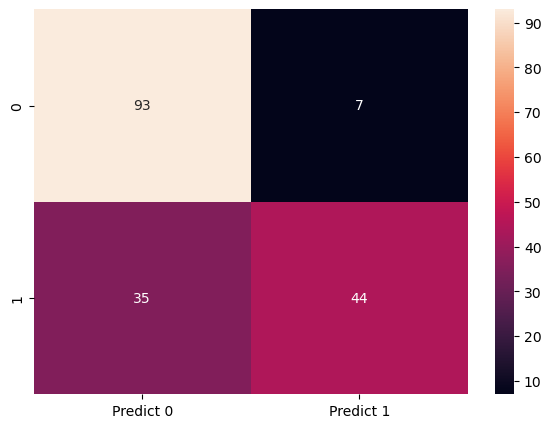

In [78]:
cm=confusion_matrix(y_test,y_pred)

xgb_df=pd.DataFrame(cm,index=[i for i in ["0","1"]],columns=[i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize=(7,5))
sns.heatmap(xgb_df,annot=True)

## 8.7 GradientBoost

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
grid={"n_estimators":[10,15,20,25,30],"learning_rate":[0,0.2,0.4,0.6,0.8,1],"max_depth":[2,3,4,5,6]}
gbc=GradientBoostingClassifier()
gbc_cv=GridSearchCV(gbc,grid,cv=10)
gbc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",gbc_cv.best_params_)
print("accuracy :",gbc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.6, 'max_depth': 4, 'n_estimators': 20}
accuracy : 0.8524843505477309


In [80]:
gbc_best=GradientBoostingClassifier(n_estimators=15,learning_rate=0.6,max_depth=4)
gbc_best.fit(X_train,y_train)
y_pred=gbc_best.predict(X_test)
gbc_accuracy=accuracy_score(y_test,y_pred)
gbc_accuracy

0.7821229050279329

<AxesSubplot:>

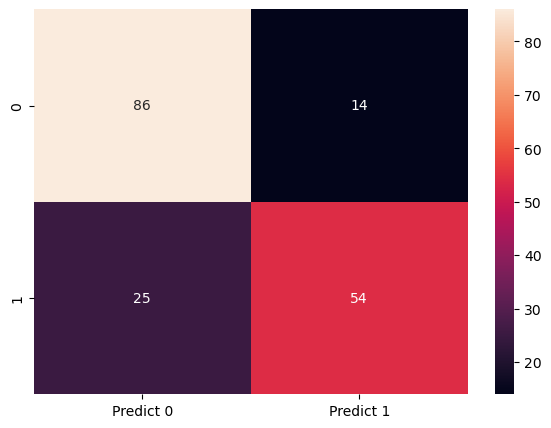

In [81]:
cm=confusion_matrix(y_test,y_pred)

gbc_df=pd.DataFrame(cm,index=[i for i in ["0","1"]],columns=[i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize=(7,5))
sns.heatmap(gbc_df,annot=True)

## Random Forest

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
grid={"n_estimators":[10,15,20,25,30],"max_depth":[2,3,4,5,6],"criterion":["gini","entropy"],"max_features":[3,4,5,6,7,8]}
rfc=RandomForestClassifier()
rfc_cv=GridSearchCV(rfc,grid,cv=10)
rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print("accuracy :",rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'n_estimators': 15}
accuracy : 0.8398865414710486


In [83]:
rfc_best=RandomForestClassifier(n_estimators=15,max_features=5,max_depth=6,criterion="gini")
rfc_best.fit(X_train,y_train)
y_pred=rfc_best.predict(X_test)
rfc_accuracy=accuracy_score(y_test,y_pred)
rfc_accuracy

0.770949720670391

<AxesSubplot:>

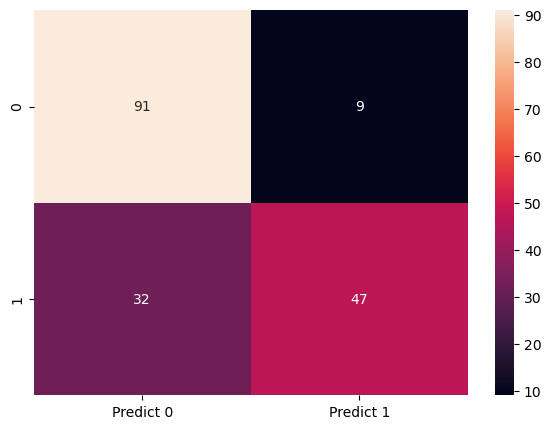

In [84]:
cm=confusion_matrix(y_test,y_pred)

rfc_df=pd.DataFrame(cm,index=[i for i in ["0","1"]],columns=[i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize=(7,5))
sns.heatmap(rfc_df,annot=True)

In [85]:
rfc_best.feature_importances_

array([0.15630035, 0.19566053, 0.01150179, 0.0169435 , 0.11819263,
       0.00920575, 0.02362967, 0.46856578])

In [86]:
pd.concat((pd.DataFrame(X_train.columns,columns=["Feature"])
         ,pd.DataFrame(rfc_best.feature_importances_,columns=["Importance"]))
         ,axis = 1).sort_values(ascending=False,by="Importance")

,Feature,Importance
7,"(Sex_male,)",0.468566
1,"(Fare,)",0.195661
0,"(Age,)",0.156300
4,"(Pclass_3,)",0.118193
6,"(Embarked_S,)",0.023630
3,"(Pclass_2,)",0.016944
2,"(isAlone,)",0.011502
5,"(Embarked_Q,)",0.009206


## Solution

In [87]:
all_accuracy=pd.DataFrame({"Model":["Logistic Regression","Gaussian Naive Bayes","K Nearest Neighbors","Support Vector Machine","Decision Tree","Random Forest","AdaBoost","XGBoost","GradientBoost"],
              "Accuracy Score":[round(lr_accuracy*100,2),round(gnb_accuracy*100,2),round(knn_accuracy*100,2),round(svm_accuracy*100,2),round(dtc_accuracy*100,),round(rfc_accuracy*100,2),
                                round(abc_accuracy*100,2),round(xgb_accuracy*100,2),round(gbc_accuracy*100,2)]
                        }).sort_values(by="Accuracy Score",ascending=False)

In [88]:
all_accuracy

,Model,Accuracy Score
8,GradientBoost,78.21
4,Decision Tree,78.00
5,Random Forest,77.09
3,Support Vector Machine,76.54
7,XGBoost,76.54
2,K Nearest Neighbors,75.98
6,AdaBoost,75.42
0,Logistic Regression,74.86
1,Gaussian Naive Bayes,73.74


## Prediction for test_data by using Random Forest

In [89]:
y_pred_final=rfc_best.predict(test_data)

In [90]:
submission=pd.DataFrame({
           "PassengerId":test_data_forfinal["PassengerId"],
            "Survived":y_pred_final
})

In [91]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [92]:
submission.to_csv("submission.csv", index=False)